#**Data Analysis of Restaurants peak Hours and Non Peak hours**
##Language :- Pyhon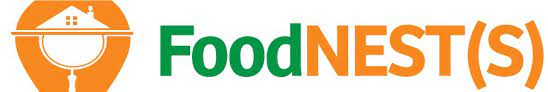

#context
The number of restaurants in India is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

#objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.  Perform the data analysis to find answers to these questions that will help the company to improve the business.



##Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

**Data Dictionary** :-

* **Top ten Restaurant:-**We Take Top 10 Restaurant At Gurugram


* **cusine_type:-**Cuisine ordered by the customer
* **Total Price:-** How Much Total Sales in A Days

* **Discounted price with coupouns:-** How Much discount with attach coupouns in a day

* **Final Price After Apply cards:-** How Much discount apply cards in days

* **Peak Hours Sales**:-How much sales in Peak Hours in day

* **Non Peak Hours Sales:-** How Much sales in Non Peak Hours
* **Surge Fees**:- In Peak Hours have change the surge fees decrease increase
* **Discounts:-** How much discount given to the customers in weekdays and weekend
* **Customer Rating:-** We are taking a restaurants above 4.5* ratinf given by the customer
* **Week Days:-** How much sales in weekdays and weekend
* **Online order:-**How Much customers order in online thorugh zomato and Swiggy
* **inperson prder:-**How much customers order through ofline in Resturant
* **Food_preparation_time:-**Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **Deliver_time:-**Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information
  


#Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/content/foodnest task.xlsx")
print(data)

                 Top_Ten_ Restaurants cuisine_type  cost_of_the_order  \
0   Burma Burma Restaurant & Tea Room       Korean            10000.0   
1                       Thai Pavilion     Japanese            15000.0   
2                      KB2 Restaurant      Mexican            20000.0   
3                            Cilantro     American            22000.0   
4                      threesixtyone°     American            24000.0   
..                                ...          ...                ...   
81                    delectable cafe     American            85000.0   
82          Lucky 9 Family Restaurant     American            65000.0   
83                   Preet Restaurant      Mexican            65250.0   
84                                NaN      Italian            63500.0   
85                                NaN          NaN                NaN   

    Discounted_Price_with_Coupons  Final_Price_after_Applying_Cards  \
0                          1000.0                   

* Total cost revenue in weekdays and weekend

In [3]:
weekday_data = data[data['Week_days'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend_data = data[data['Week_days'].isin(['Saturday', 'Sunday'])]

# Calculating total revenue for weekdays and weekends
total_revenue_weekdays = weekday_data['cost_of_the_order'].sum()
total_revenue_weekends = weekend_data['cost_of_the_order'].sum()

# Displaying the result
print(f'Total Revenue on Weekdays: ${total_revenue_weekdays}')
print(f'Total Revenue on Weekends: ${total_revenue_weekends}')

Total Revenue on Weekdays: $1530000.0
Total Revenue on Weekends: $1220750.0


In [4]:
def calculate_discounted_price(listed_price, coupon_discount, card_discount):
    # Calculate discounted price with coupons
    discounted_with_coupons = listed_price * (1 - coupon_discount / 100)

    # Calculate final price after applying card discount
    final_price = discounted_with_coupons * (1 - card_discount / 100)

    return discounted_with_coupons, final_price

# Example usage:
listed_price = 10000  # Replace with your actual listed price
coupon_discount = 10  # Replace with your coupon discount percentage
card_discount = 5  # Replace with your card discount percentage

discounted_price_with_coupons, final_price = calculate_discounted_price(listed_price, coupon_discount, card_discount)

print(f"Listed Price: ${listed_price}")
print(f"Discounted Price with Coupons ({coupon_discount}% off): ${discounted_price_with_coupons}")
print(f"Final Price after Applying Card Discount ({card_discount}% off): ${final_price}")


Listed Price: $10000
Discounted Price with Coupons (10% off): $9000.0
Final Price after Applying Card Discount (5% off): $8550.0


*find calculation deviation

In [5]:
import pandas as pd

def calculate_deviation_factor(cost_of_the_order, Discounted_Price_with_Coupons):
    deviation_factor = (cost_of_the_order - Discounted_Price_with_Coupons) / Discounted_Price_with_Coupons
    return deviation_factor

def analyze_deviation_contributions(data):
    # Calculate deviation for each row
    data['Original Deviation'] = calculate_deviation_factor(data['Discounted_Price_with_Coupons'], data['cost_of_the_order'])

    # Calculate deviation contribution of coupon discount
    data['Coupon Deviation Contribution'] = (data['cost_of_the_order'] * data['Discounts'] / 100) / data['cost_of_the_order']

    # Calculate deviation contribution of card discount
    data['Card Deviation Contribution'] = (data['cost_of_the_order'] * data['Discounts'] / 100) / data['cost_of_the_order']

    # Calculate total deviation contributions
    data['Total Deviation Contributions'] = data['Coupon Deviation Contribution'] + data['Card Deviation Contribution']

    return data



data = pd.DataFrame(data)

# Analyze deviation contributions
data = analyze_deviation_contributions(data)

# Display the DataFrame with deviation contributions
print(data)


                 Top_Ten_ Restaurants cuisine_type  cost_of_the_order  \
0   Burma Burma Restaurant & Tea Room       Korean            10000.0   
1                       Thai Pavilion     Japanese            15000.0   
2                      KB2 Restaurant      Mexican            20000.0   
3                            Cilantro     American            22000.0   
4                      threesixtyone°     American            24000.0   
..                                ...          ...                ...   
81                    delectable cafe     American            85000.0   
82          Lucky 9 Family Restaurant     American            65000.0   
83                   Preet Restaurant      Mexican            65250.0   
84                                NaN      Italian            63500.0   
85                                NaN          NaN                NaN   

    Discounted_Price_with_Coupons  Final_Price_after_Applying_Cards  \
0                          1000.0                   

In [6]:


# # Create a DataFrame with sample data
# data = {
#     'Surge Fees': [5, 8, 10, 15, 6],
#     'Discounts': [10, 5, 8, 12, 6],
#     'Peak Hours': [True, True, False, True, False]
# }

# df = pd.DataFrame(data)

# # Filter data for peak hours
# peak_hours_df = df[df['Peak Hours']]

# # Calculate the correlation coefficient
# correlation_coefficient = peak_hours_df['Surge Fees'].corr(peak_hours_df['Discounts'])

# print(f"Correlation Coefficient between Surge Fees and Discounts during Peak Hours: {correlation_coefficient:.2f}")


In [7]:
#we see data top 10 head
data.head(10)

,Top_Ten_ Restaurants,cuisine_type,cost_of_the_order,Discounted_Price_with_Coupons,Final_Price_after_Applying_Cards,Peak_Hours_sales_12pm-2:30pm,Non-Peak_Hour_Sales_6pm-8:30pm,Surge_Fees,Discounts,Customer_Ratings,Week_days,Online_order,inperson_order,food_preparation_time,Deliver_time,Original Deviation,Coupon Deviation Contribution,Card Deviation Contribution,Total Deviation Contributions
0,Burma Burma Restaurant & Tea Room,Korean,10000.0,1000.0,500.0,8000,2000,yes,0.1,4.5,Monday,85.0,60.0,25.0,20.0,-0.9,0.001,0.001,0.002
1,Thai Pavilion,Japanese,15000.0,1500.0,750.0,10000,5000,yes,0.1,4.5,Monday,200.0,80.0,25.0,23.0,-0.9,0.001,0.001,0.002
2,KB2 Restaurant,Mexican,20000.0,2000.0,1000.0,15000,5000,no,0.1,4.5,Monday,90.0,70.0,23.0,28.0,-0.9,0.001,0.001,0.002
3,Cilantro,American,22000.0,2200.0,1100.0,16000,6000,yes,0.1,4.5,Monday,150.0,85.0,25.0,15.0,-0.9,0.001,0.001,0.002
4,threesixtyone°,American,24000.0,2400.0,1200.0,18000,6000,yes,0.1,4.5,Monday,85.0,90.0,25.0,24.0,-0.9,0.001,0.001,0.002
5,Greenr Cafe,Indian,28000.0,2800.0,1400.0,20000,8000,no,0.1,4.5,Monday,190.0,82.0,20.0,24.0,-0.9,0.001,0.001,0.002
6,OISHII WOK,Italian,30000.0,3000.0,1500.0,22000,8000,no,0.1,4.5,Monday,150.0,45.0,28.0,21.0,-0.9,0.001,0.001,0.002
7,Spectra,Mediterranean,42000.0,4200.0,2100.0,36000,6000,yes,0.1,4.5,Monday,250.0,35.0,33.0,30.0,-0.9,0.001,0.001,0.002
8,Almadhaq,Indian,45000.0,4500.0,2250.0,35000,10000,no,0.1,4.5,Monday,300.0,45.0,21.0,26.0,-0.9,0.001,0.001,0.002
9,delectable cafe,Indian,48000.0,4800.0,2400.0,36000,12000,yes,0.1,4.5,Monday,350.0,58.0,29.0,26.0,-0.9,0.001,0.001,0.002


In [8]:
#We see data bottom 10
data.tail(10)

,Top_Ten_ Restaurants,cuisine_type,cost_of_the_order,Discounted_Price_with_Coupons,Final_Price_after_Applying_Cards,Peak_Hours_sales_12pm-2:30pm,Non-Peak_Hour_Sales_6pm-8:30pm,Surge_Fees,Discounts,Customer_Ratings,Week_days,Online_order,inperson_order,food_preparation_time,Deliver_time,Original Deviation,Coupon Deviation Contribution,Card Deviation Contribution,Total Deviation Contributions
76,threesixtyone°,Japanese,52000.0,13000.0,2600.0,40000,12000,NaN,0.25,4.5,Sunday,400.0,90.0,20.0,18.0,-0.75,0.0025,0.0025,0.005
77,Greenr Cafe,Indian,60000.0,18000.0,3000.0,40000,20000,NaN,0.30,4.5,Sunday,420.0,180.0,20.0,29.0,-0.70,0.0030,0.0030,0.006
78,OISHII WOK,Chinese,65000.0,16250.0,3250.0,35000,30000,NaN,0.25,4.5,Sunday,425.0,160.0,31.0,30.0,-0.75,0.0025,0.0025,0.005
79,Spectra,Chinese,70000.0,21000.0,3500.0,50000,20000,NaN,0.30,4.5,Sunday,350.0,150.0,34.0,27.0,-0.70,0.0030,0.0030,0.006
80,Almadhaq,American,80000.0,28000.0,4000.0,60000,20000,NaN,0.35,4.5,Sunday,380.0,145.0,33.0,25.0,-0.65,0.0035,0.0035,0.007
81,delectable cafe,American,85000.0,42500.0,4250.0,55000,30000,NaN,0.50,4.5,Sunday,375.0,130.0,21.0,32.0,-0.50,0.0050,0.0050,0.010
82,Lucky 9 Family Restaurant,American,65000.0,19500.0,3250.0,40000,25000,NaN,0.30,4.5,Sunday,360.0,125.0,35.0,28.0,-0.70,0.0030,0.0030,0.006
83,Preet Restaurant,Mexican,65250.0,13050.0,3262.5,40000,25250,NaN,0.20,4.5,Sunday,450.0,250.0,22.0,18.0,-0.80,0.0020,0.0020,0.004
84,NaN,Italian,63500.0,19050.0,3175.0,50000,15250,NaN,0.30,4.5,Sunday,550.0,300.0,34.0,16.0,-0.70,0.0030,0.0030,0.006
85,NaN,NaN,NaN,0.0,NaN,40000,23500,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Get the shape of the dataset
shape = data.shape
print(shape)
#Put the number of rows in a variable to use it further in the analysis
total_orders = shape[0]

(86, 19)


We find that 86 Rows and 15 columns in my Data

In [10]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Top_Ten_ Restaurants              84 non-null     object 
 1   cuisine_type                      85 non-null     object 
 2   cost_of_the_order                 85 non-null     float64
 3   Discounted_Price_with_Coupons     86 non-null     float64
 4   Final_Price_after_Applying_Cards  85 non-null     float64
 5   Peak_Hours_sales_12pm-2:30pm      86 non-null     int64  
 6    Non-Peak_Hour_Sales_6pm-8:30pm   86 non-null     int64  
 7   Surge_Fees                        43 non-null     object 
 8   Discounts                         86 non-null     float64
 9    Customer_Ratings                 85 non-null     float64
 10  Week_days                         85 non-null     object 
 11  Online_order                      85 non-null     float64
 12  inperson_o

In [11]:
# Check for missing values in the data
data.isnull().sum()

Top_Ten_ Restaurants                 2
cuisine_type                         1
cost_of_the_order                    1
Discounted_Price_with_Coupons        0
Final_Price_after_Applying_Cards     1
Peak_Hours_sales_12pm-2:30pm         0
 Non-Peak_Hour_Sales_6pm-8:30pm      0
Surge_Fees                          43
Discounts                            0
 Customer_Ratings                    1
Week_days                            1
Online_order                         1
inperson_order                       2
food_preparation_time                1
Deliver_time                         1
Original Deviation                   1
Coupon Deviation Contribution        1
Card Deviation Contribution          1
Total Deviation Contributions        1
dtype: int64

#*observations*

According to this result, there is 1 missing values in Cuisine-type,Total price,Final price after applying card,customer Ratings,Week days,online order,Deliver_time and 2 null values in Top ten Restaurants,43 null values in Surge fees,0 null values peak hours,non-peak hours and discount

Q-Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [12]:
# The summary statistics of the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Top_Ten_ Restaurants,84,12,Burma Burma Restaurant & Tea Room,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,85,11,American,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,85.0,NaN,NaN,NaN,33079.411765,16907.93575,8000.0,20000.0,30000.0,45000.0,85000.0
Discounted_Price_with_Coupons,86.0,NaN,NaN,NaN,7358.953488,6807.599565,0.0,3050.0,4800.0,8850.0,42500.0
Final_Price_after_Applying_Cards,85.0,NaN,NaN,NaN,1653.970588,845.396787,400.0,1000.0,1500.0,2250.0,4250.0
Peak_Hours_sales_12pm-2:30pm,86.0,NaN,NaN,NaN,24476.744186,12475.601359,6000.0,15000.0,22000.0,35000.0,60000.0
Non-Peak_Hour_Sales_6pm-8:30pm,86.0,NaN,NaN,NaN,9174.418605,5740.217992,2000.0,6000.0,8000.0,10000.0,30000.0
Surge_Fees,43,2,yes,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discounts,86.0,NaN,NaN,NaN,0.225349,0.171084,0.05,0.1225,0.2,0.3,1.5
Customer_Ratings,85.0,NaN,NaN,NaN,4.5,0.0,4.5,4.5,4.5,4.5,4.5


#Observations:-

The minimum, average, and maximum time it takes for food to be prepared once an order is placed are 15, 24.05 and 33 min respectively

In [13]:
# Sample data representing orders with corresponding days
orders = [
    {"order_id": 1, "day": "Monday"},
    {"order_id": 2, "day": "Tuesday"},
    {"order_id": 3, "day": "Wednesday"},
    {"order_id": 4, "day": "Thursday"},
    {"order_id": 5, "day": "Friday"},
    # Add more orders as needed
]

# Dictionary to store the total orders for each day
total_orders_per_day = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0}

# Calculate total orders for each day
for order in orders:
    day = order["day"]
    total_orders_per_day[day] += 1

# Print the results
for day, total_orders in total_orders_per_day.items():
    print(f"Total orders on {day}: {total_orders}")


Total orders on Monday: 1
Total orders on Tuesday: 1
Total orders on Wednesday: 1
Total orders on Thursday: 1
Total orders on Friday: 1


In [14]:
 columns = data.columns
 print(columns)

Index(['Top_Ten_ Restaurants', 'cuisine_type', 'cost_of_the_order',
       'Discounted_Price_with_Coupons', 'Final_Price_after_Applying_Cards',
       'Peak_Hours_sales_12pm-2:30pm', ' Non-Peak_Hour_Sales_6pm-8:30pm',
       'Surge_Fees', 'Discounts', ' Customer_Ratings', 'Week_days',
       'Online_order', 'inperson_order', 'food_preparation_time',
       'Deliver_time', 'Original Deviation', 'Coupon Deviation Contribution',
       'Card Deviation Contribution', 'Total Deviation Contributions'],
      dtype='object')


In [15]:
# Dataset Duplicate Value Count
dup = data.duplicated().sum()
print(dup)

0


#Exploratory Data Analysis (EDA)

##Univariate Analysis

Question:-Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [16]:
def convert_int(x):
  if x.isdigit():
      return eval(x)
  else:
    if ',' in x:
       x=x.replace(',','')
    if '+' in x:
       x=x.replace('+','')
    if 'M' in x:
       x=x.replace('M','')        # since this value occurs in Size we are converting Millions to int format by adding 6 zeros to the same
       x= eval(x)
       x = x * 10**6
       return x
    if 'k' in x:
      x=x.replace('k','')
      x = eval(x)
      x= x * 10**3
      return x
    if '$' in x:
       x=x.replace('$','') #this occurs in price column, so we are taking out the $ symbol
    if x=='Free' or x=='Varies with device'or x=='Everyone':    #there are some columns entered with missplaced values, setting them to zero.
       x=0
    else:
       x= eval(x)
       return x

In [17]:
# Convert 'cuisine_type', 'day_of_the_week' to category
# Convert Ids to string
Data= data.astype({'cost_of_the_order': str,'Discounted_Price_with_Coupons' : str, 'cuisine_type':'category','Week_days':str})
Data.dtypes

Top_Ten_ Restaurants                  object
cuisine_type                        category
cost_of_the_order                     object
Discounted_Price_with_Coupons         object
Final_Price_after_Applying_Cards     float64
Peak_Hours_sales_12pm-2:30pm           int64
 Non-Peak_Hour_Sales_6pm-8:30pm        int64
Surge_Fees                            object
Discounts                            float64
 Customer_Ratings                    float64
Week_days                             object
Online_order                         float64
inperson_order                       float64
food_preparation_time                float64
Deliver_time                         float64
Original Deviation                   float64
Coupon Deviation Contribution        float64
Card Deviation Contribution          float64
Total Deviation Contributions        float64
dtype: object

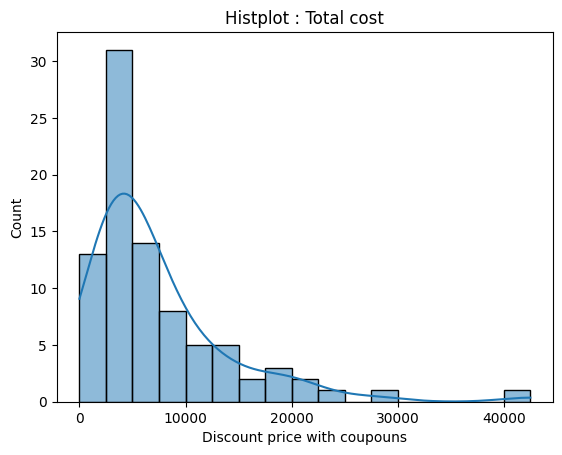

In [18]:
# plot of the variable cost_of_the_rder
# Histplot
plt.title('Histplot : Total cost')
plt.xlabel('Discount price with coupouns')
sns.histplot(data= data, x= 'Discounted_Price_with_Coupons', kde=True);
plt.show();
# Boxplot


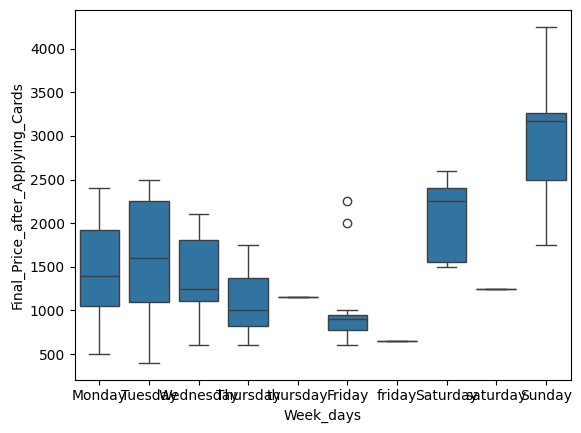

In [19]:
# Boxplot We can see the outlier from the mean value
sns.boxplot(data = data,x= 'Week_days',y='Final_Price_after_Applying_Cards',orient='vertical')
plt.show();

* Food preparation time

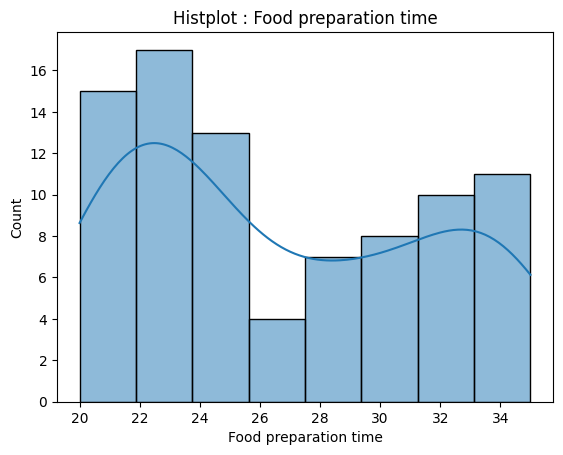

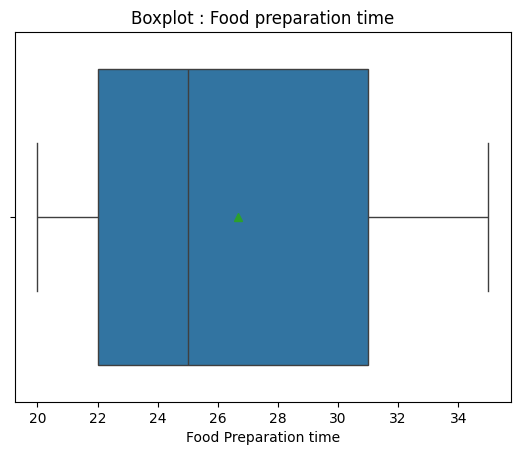

In [20]:
# plot of the variable food_preparation_time
# Histplot
plt.title('Histplot : Food preparation time')
plt.xlabel('Food preparation time')
sns.histplot(data= data, x= "food_preparation_time", kde= True);
plt.show();
# Boxplot
plt.title('Boxplot : Food preparation time')
sns.boxplot(data = data, x = 'food_preparation_time',showmeans=True).set(xlabel='Food Preparation time');
plt.show();

* The variable has a normal distribution.

* The mean and the median are almost the same.

* The minimum time of preparation is 20 min and the maximum is 35 min

Delivery Time

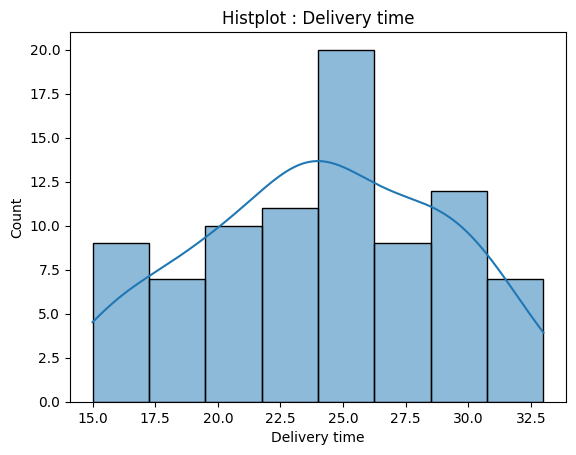

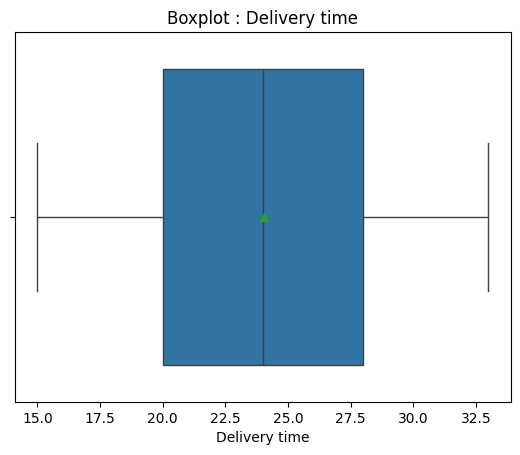

In [21]:
# plot of the variable delivery_time
# Histplot
plt.title('Histplot : Delivery time')
plt.xlabel('Delivery time')
sns.histplot(data= data, x= "Deliver_time", kde= True);
plt.show();
# Boxplot
plt.title('Boxplot : Delivery time')
sns.boxplot(data = data, x = 'Deliver_time', showmeans=True).set(xlabel='Delivery time');
plt.show();

* The distribution of Delivery time is left skewed.
* There is no outliers in this variable.
* 75% of the orders are delivered in less than 28.
* The rang of the delivery is between 15 and 33 minutes.
* The delivery is generally dependent on several external factors, such as proximity to the customer, traffic jams, weather

Overview on the count of unique customer_id values 
 45000.0    8
35000.0    7
30000.0    6
15000.0    5
20000.0    5
25000.0    5
18000.0    5
50000.0    4
22000.0    4
40000.0    4
12000.0    4
42000.0    3
16000.0    2
65000.0    2
23000.0    2
32000.0    2
24000.0    2
52000.0    2
80000.0    1
60000.0    1
85000.0    1
70000.0    1
65250.0    1
10000.0    1
46000.0    1
13000.0    1
14000.0    1
8000.0     1
48000.0    1
28000.0    1
63500.0    1
Name: cost_of_the_order, dtype: int64
The Number of orders in the dataset is 31
The number of orders with 1 order is 13, wich is 41.94% of customers and 4.19% of orders placed
The Total order placed by the first 20 customers is 74, wich is 238.71 % of orders


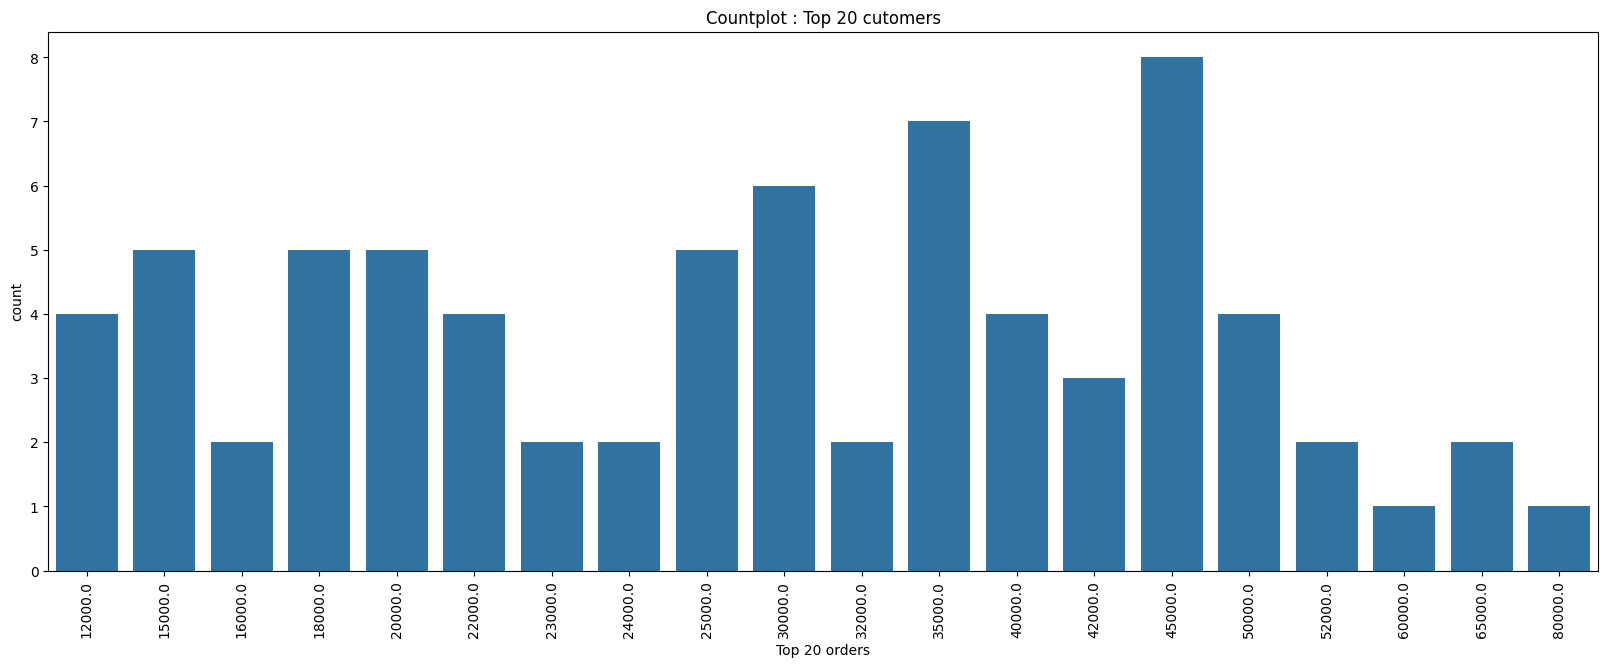

In [22]:
# Check the occurrence of each orders with value_counts
orders = data['cost_of_the_order'].value_counts()

# Number of unique customers in the dataset
total_orders =  orders.shape[0]

# List of the 20 first customer
first_20_orders = orders.index.to_list()[0:20]

# Calculate the sum of orders made by first_20_customer
nombre_oders_by20f_cust = sum(orders.values[0:20])

# Number of customers with 1 order
nbr_customers_1order = len([x for x in orders.values if x == 1])

# print the results
print('Overview on the count of unique customer_id values \n',orders)
print('The Number of orders in the dataset is {:d}'.format(total_orders))
print('The number of orders with 1 order is {:d}, wich is {:.2f}% of customers and {:.2f}% of orders placed'.\
      format(nbr_customers_1order,nbr_customers_1order/total_orders*100,nbr_customers_1order/total_orders*10))
print('The Total order placed by the first 20 customers is {:d}, wich is {:.2f} % of orders'.format(nombre_oders_by20f_cust,nombre_oders_by20f_cust/total_orders*100))

# plot the list nombre_customer_f15
plt.figure(figsize=(20,7))
plt.title('Countplot : Top 20 cutomers')
sns.countplot(data= data.loc[data['cost_of_the_order'].isin(first_20_orders)], x= "cost_of_the_order").set(xlabel='Top 20 orders');
plt.xticks(rotation=90);
plt.show();

* The Number of orders in the dataset is 31
* The number of orders with 1 order is 13, wich is 41.94% of customers and 4.19% of orders placed
* The Total order placed by the first 20 customers is 74, wich is 238.71 % of orders

Overview on the count of unique restaurant_name 
 Burma Burma Restaurant & Tea Room    7
Thai Pavilion                        7
KB2 Restaurant                       7
Cilantro                             7
threesixtyone°                       7
Greenr Cafe                          7
OISHII WOK                           7
Spectra                              7
Almadhaq                             7
delectable cafe                      7
Lucky 9 Family Restaurant            7
Preet Restaurant                     7
Name: Top_Ten_ Restaurants, dtype: int64
Total Restaurant is  12
The number of restaurants with 1 order placed is 0, which is 0.00% of the number of restaurants and 0.00% of orders
The Total order placed to the first  restuarants is 84, which is approximately 270.97 % of orders


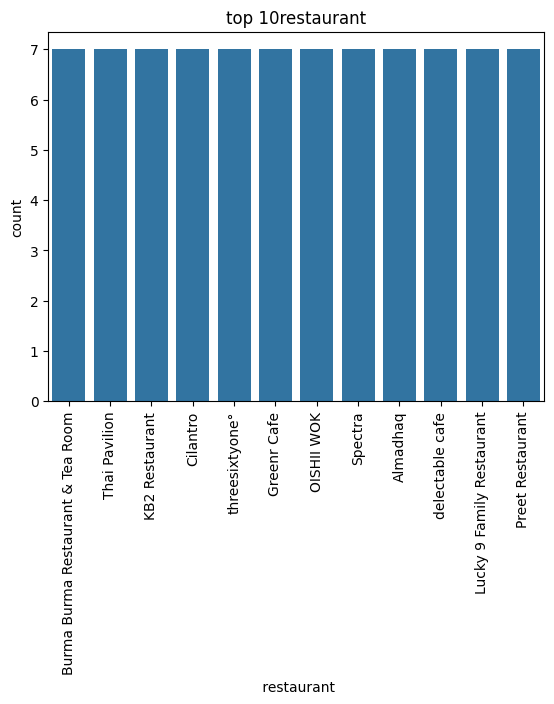

In [23]:
# Check the occurrence of each restaurant and print it
cost_of_the_order=data['Top_Ten_ Restaurants'].value_counts()

# Total Restaurant
total_restaurants = cost_of_the_order.shape[0]

# Make a list of the 15 first restaurant
first_15_restaurant= cost_of_the_order.index.to_list()[0:15]

# Calculate the sum of orders
nombre_orders_f15 = sum(cost_of_the_order.values[0:15])

# Number of Restaurant that received 1 order
nbr_restaurant_1order = len([x for x in cost_of_the_order.values if x == 1])

#print
print('Overview on the count of unique restaurant_name \n',cost_of_the_order)
print('Total Restaurant is ',total_restaurants)
print('The number of restaurants with 1 order placed is {:d}, which is {:.2f}% of the number of restaurants and {:.2f}% of orders'.\
      format(nbr_restaurant_1order,nbr_restaurant_1order/total_restaurants*100,nbr_restaurant_1order/total_orders*100))
print('The Total order placed to the first  restuarants is {:d}, which is approximately {:.2f} % of orders'.format(nombre_orders_f15,nombre_orders_f15/total_orders*100))


# plot the list first_15_restaurant
sns.countplot(data= data.loc[data['Top_Ten_ Restaurants'].isin(first_15_restaurant)], x= "Top_Ten_ Restaurants").set(title='top 10restaurant', xlabel=' restaurant');
plt.xticks(rotation=90);
plt.show();

* Total Restaurant is  12
* The number of restaurants with 1 order placed is 0, which is 0.00% of the number of restaurants and 0.00% of orders
* The Total order placed to the first  restuarants is 84, which is approximately 270.97 % of orders

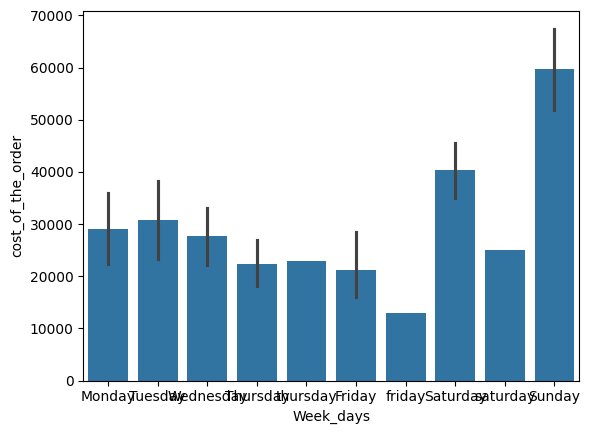

In [24]:
sns.barplot(x="Week_days",y="cost_of_the_order",data=data)
plt.show();

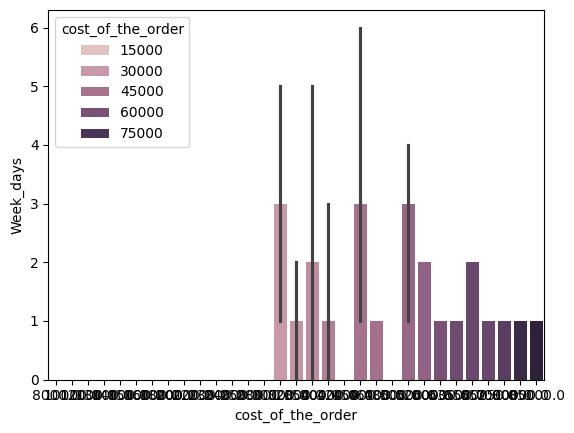

In [25]:
# Create a new column 'Weekend' based on the 'Weekdays' column
data['Week_days'] = data['Week_days'].isin(['Saturday', 'Sunday'])

# Use Seaborn barplot with hue='Weekend' to distinguish between weekdays and weekends
sns.barplot(x="cost_of_the_order", y="Week_days", hue="cost_of_the_order", data=data, estimator=sum)  # You can use 'sum' as the estimator to get the total sales
plt.show()

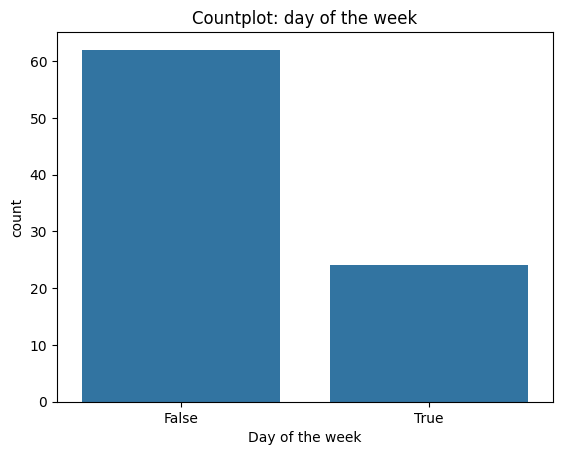

In [26]:
sns.countplot(data= data, x= "Week_days").set(title='Countplot: day of the week', xlabel='Day of the week');
plt.show();

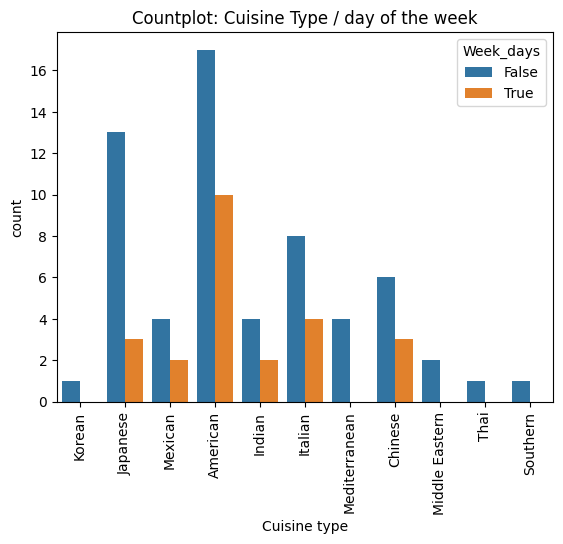

In [27]:
# check if the preference of customers changes en weekend
sns.countplot(data= data, x= "cuisine_type", hue='Week_days').set(title='Countplot: Cuisine Type / day of the week', xlabel='Cuisine type');
plt.xticks(rotation=90);
plt.show()

The number of orders in American is higher than the week days

In [28]:
# create a new column total_time delivery
data['total_time_delivery'] = data['food_preparation_time']+data['Deliver_time']

# check statistics with describe
data['total_time_delivery'].describe()

count    85.000000
mean     50.729412
std       6.585316
min      37.000000
25%      46.000000
50%      50.000000
75%      55.000000
max      64.000000
Name: total_time_delivery, dtype: float64

* The total average delivery time is 50.72 minutes
* 50% of orders have a total delivery time higher than 50 minutes

Question : Which are the top 5 restaurants in terms of the number of orders received?

In [29]:
import pandas as pd

# # Replace this with your actual data or API call
# #data = {
#     'Restaurant': ['Top_Ten_ Restaurants '],
#     'cost_of_the_orders': ['cost_of_the_order']
# }

# data = pd.DataFrame(data)

# # Sorting the dataframe by the 'cost_of_the_order' column in descending order
# data_sorted = data.sort_values(by='cost_of_the_orders', ascending=False)

# # Selecting the top 5 orders based on cost
# top_5_orders = data_sorted.head(5)

# # Displaying the result
# print(top_5_orders)


* Which is the most popular cuisine on weekends?

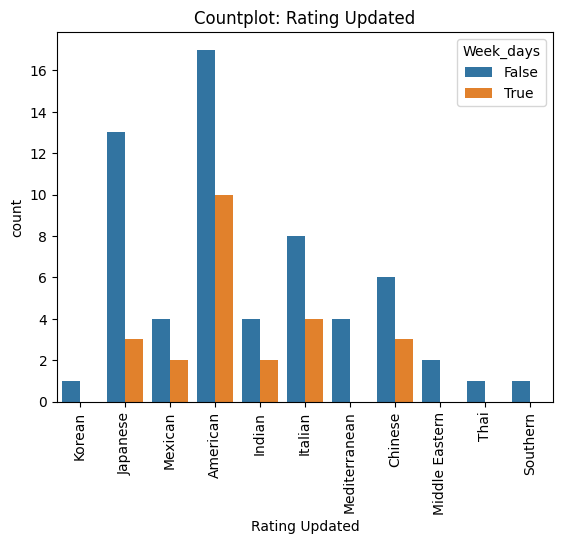

In [30]:
sns.countplot(data=data,x="cuisine_type", hue='Week_days')
plt.title('Countplot: Rating Updated')
plt.xlabel('Rating Updated')
plt.xticks(rotation=90)
plt.show()

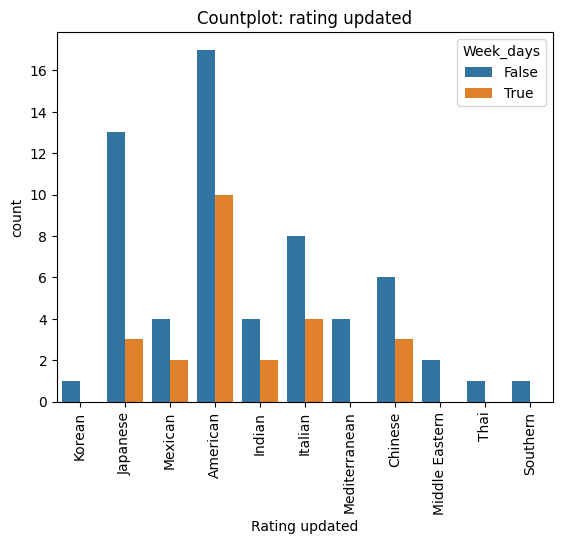

In [31]:
# check the most popular cuisine on weekends
sns.countplot(data= data, x="cuisine_type",hue='Week_days').set(title='Countplot: rating updated', xlabel = 'Rating updated');
plt.xticks(rotation=90);
plt.show();

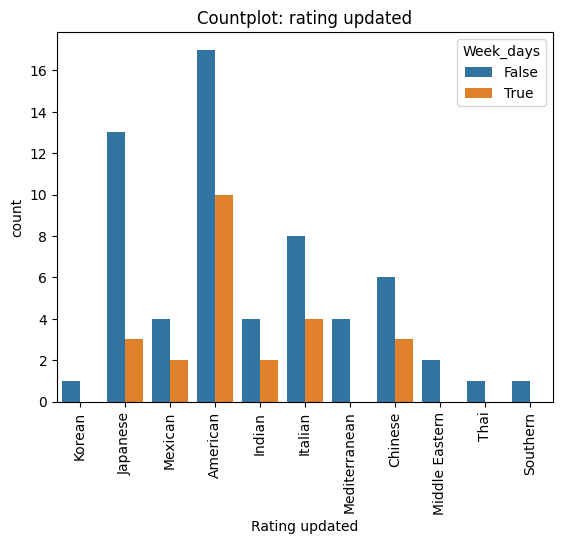

In [32]:
# check the most popular cuisine on weekends
sns.countplot(data= data, x= "cuisine_type", hue='Week_days').set(title='Countplot: rating updated', xlabel = 'Rating updated');
plt.xticks(rotation=90);
plt.show();

Question : What percentage of the orders cost more than 15000?

In [34]:
# check the number of orders that have more than 20% and divide it by total_orders
# total_orders is calculated previously total_orders = df.shape[0]
data.loc[data['cost_of_the_order'] > 15000].shape[0]/total_orders * 100

232.25806451612905

What is the mean order delivery time

In [35]:
data['Deliver_time'].mean()

24.058823529411764

In [36]:
data['cost_of_the_order'].mean()

33079.41176470588

Question : The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the Restaurants of these customers and the number of orders they placed

In [37]:
# Select the 5 most frequent customers with value_counts
data['Top_Ten_ Restaurants'].value_counts()[0:5]

Burma Burma Restaurant & Tea Room    7
Thai Pavilion                        7
KB2 Restaurant                       7
Cilantro                             7
threesixtyone°                       7
Name: Top_Ten_ Restaurants, dtype: int64

#Multivariate Analysis

Question : Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<ipython-input-38-ab69daba49d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap='Spectral', vmin=-1, vmax=1).set(title='Heatmap: Correlation between numerical variables')


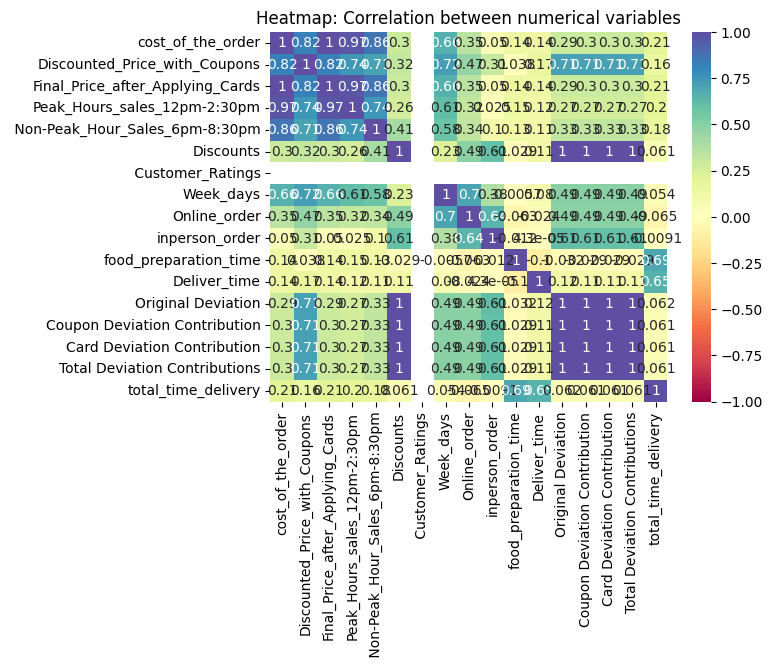

In [38]:
# heatmap
sns.heatmap(data.corr(),annot=True, cmap='Spectral', vmin=-1, vmax=1).set(title='Heatmap: Correlation between numerical variables')
plt.show();

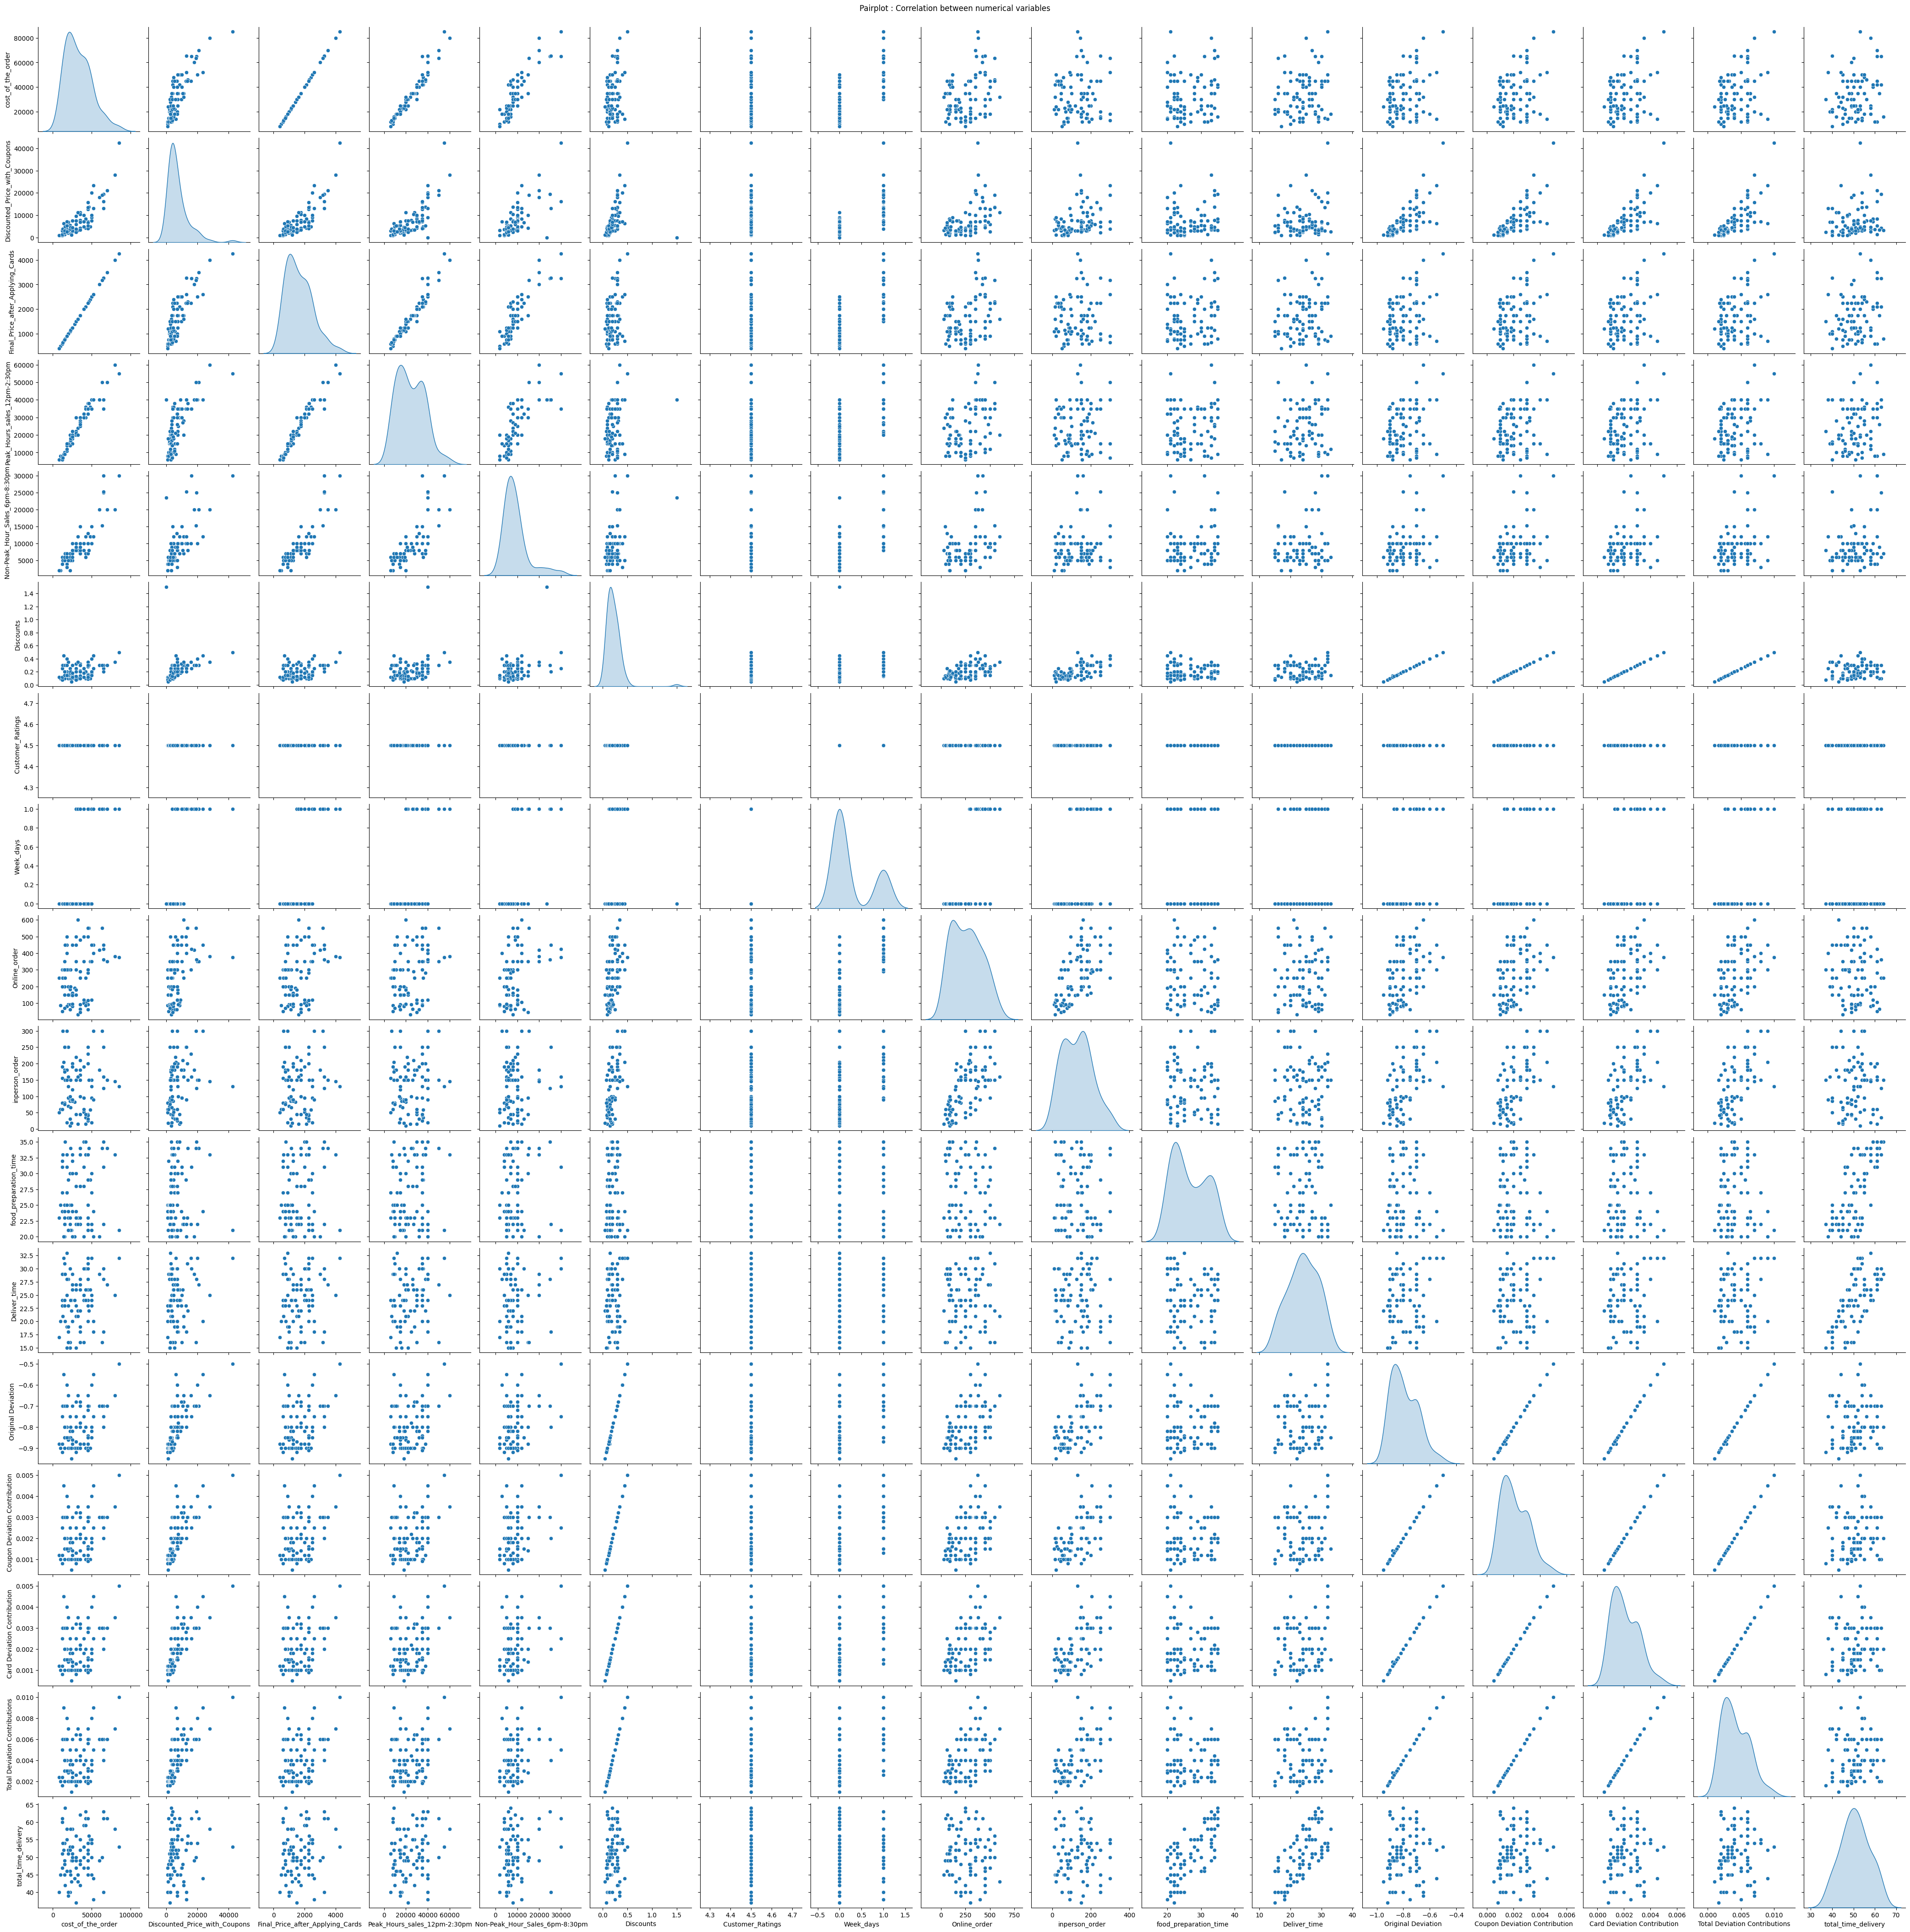

In [39]:
#pairplot
sns.pairplot(data=data, diag_kind="kde").fig.suptitle('Pairplot : Correlation between numerical variables',y=1)
plt.show();

Top_Ten_ Restaurants

Top_Ten_ Restaurants                  object
cuisine_type                        category
cost_of_the_order                     object
Discounted_Price_with_Coupons         object
Final_Price_after_Applying_Cards     float64
Peak_Hours_sales_12pm-2:30pm           int64
 Non-Peak_Hour_Sales_6pm-8:30pm        int64
Surge_Fees                            object
Discounts                            float64
 Customer_Ratings                    float64
Week_days                             object
Online_order                         float64
inperson_order                       float64
food_preparation_time                float64
Deliver_time

In [40]:
# create a new dataframe that contains informations by restuarant
data_restaurant=data.groupby('Top_Ten_ Restaurants').agg({'inperson_order':'count',
                                               'cuisine_type':'nunique',
                                               'cost_of_the_order':'mean',
                                               'food_preparation_time':'mean',
                                               'Deliver_time':'mean',
                                               'Peak_Hours_sales_12pm-2:30pm':'mean',
                                               'Peak_Hours_sales_12pm-2:30pm':'first',
                                               'Surge_Fees': lambda x: x[x!='Not given'].count() })


data_restaurant = data_restaurant.rename(columns={'order_id': 'Nbre_of_orders','customer_id':'Nbre_of_customers','rating':'Nbre_of_rating'})

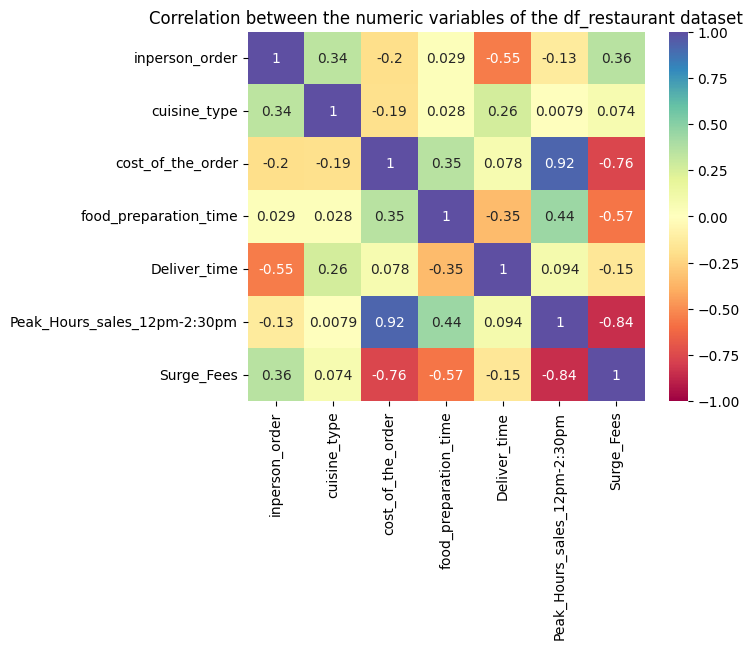

In [41]:
sns.heatmap(data_restaurant.corr(),annot=True, cmap='Spectral', vmin=-1, vmax=1).set(title='Correlation between the numeric variables of the df_restaurant dataset')
plt.show();

*Relation between cuisine type and cost of the order

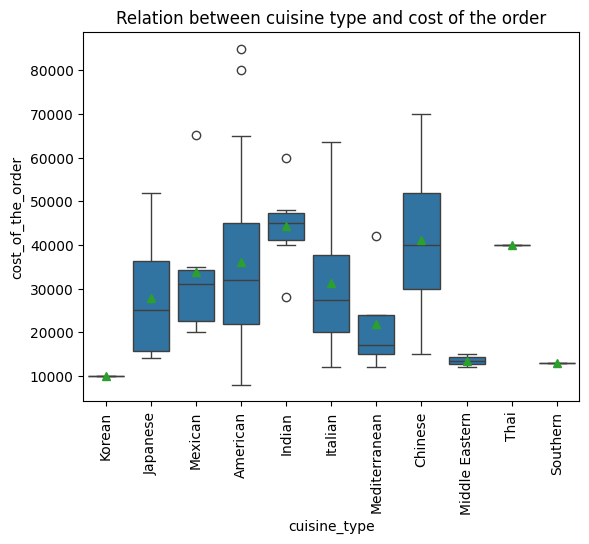

In [42]:
sns.boxplot(data=data, x='cuisine_type', y='cost_of_the_order', showmeans=True).set(title='Relation between cuisine type and cost of the order')
plt.xticks(rotation=90);
plt.show();

* Relation between cuisine type and food preperation time

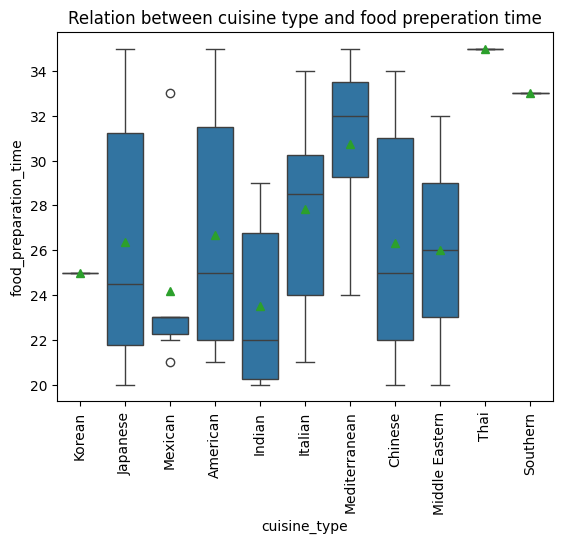

In [43]:
# plot of the relation
sns.boxplot(data=data, x='cuisine_type', y='food_preparation_time', showmeans=True)\
.set(title='Relation between cuisine type and food preperation time')
plt.xticks(rotation=90);
plt.show();

Realations Between Week day and Peak hours sales

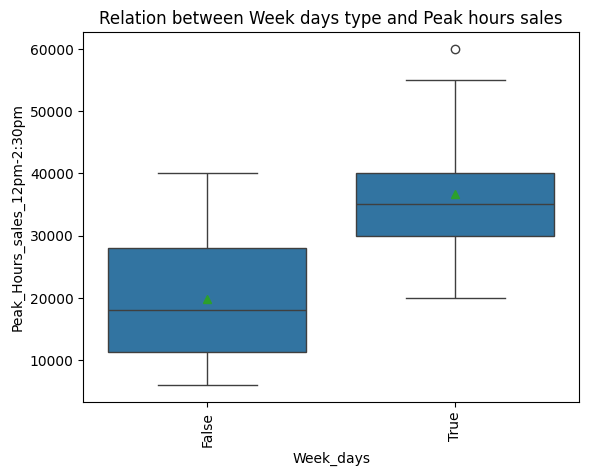

In [44]:
# plot of the relation
sns.boxplot(data=data, x='Week_days', y='Peak_Hours_sales_12pm-2:30pm', showmeans=True)\
.set(title='Relation between Week days type and Peak hours sales')
plt.xticks(rotation=90);
plt.show();

* Relation between Restaurants and delivery time

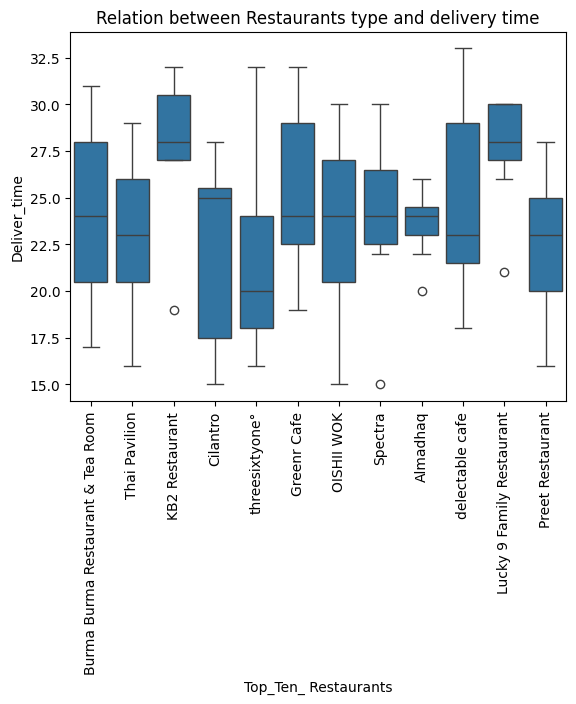

In [45]:
# plot of the relation
sns.boxplot(data=data, x='Top_Ten_ Restaurants', y='Deliver_time')\
.set(title='Relation between Restaurants type and delivery time')
plt.xticks(rotation=90);
plt.show();

* Relation between days of the week and final price after apply card

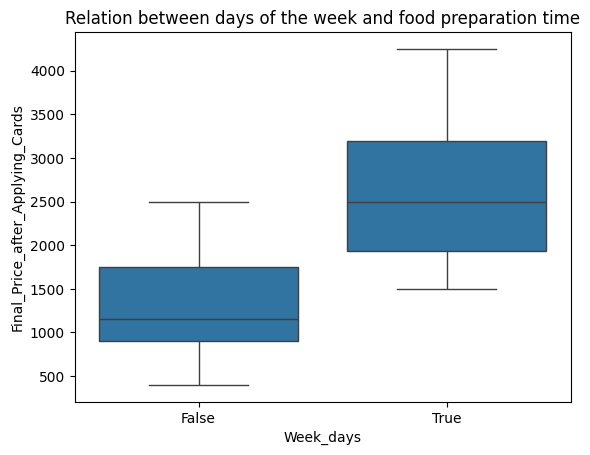

In [46]:
# plot of the relation
sns.boxplot(data=data, x='Week_days', y='Final_Price_after_Applying_Cards')\
.set(title='Relation between days of the week and food preparation time')
plt.show();

* Relation between days of the week and delivery time

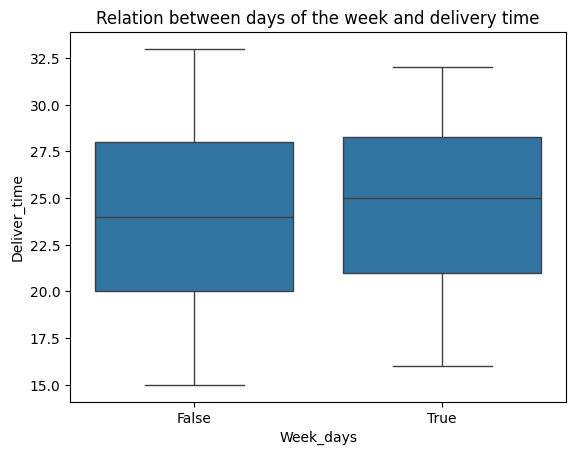

In [47]:
# plot of the relation
sns.boxplot(data=data, x='Week_days', y='Deliver_time')\
.set(title='Relation between days of the week and delivery time')
plt.show();

* Relation between rating and the others numerical variables

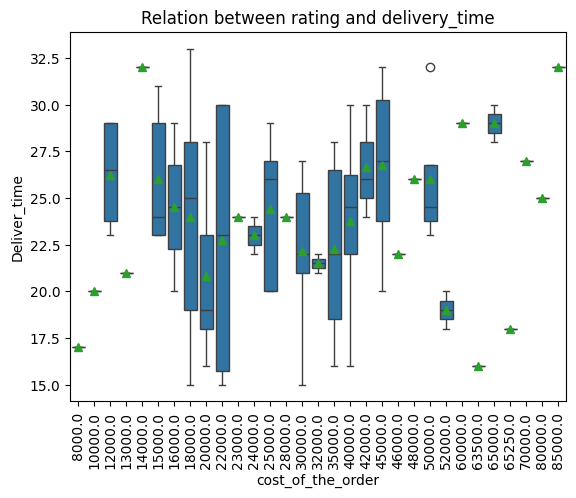

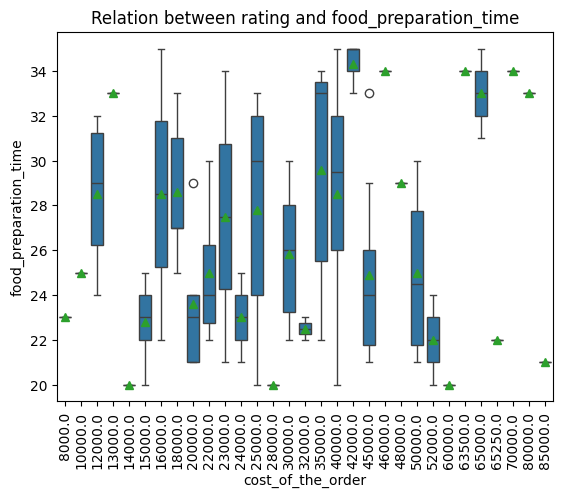

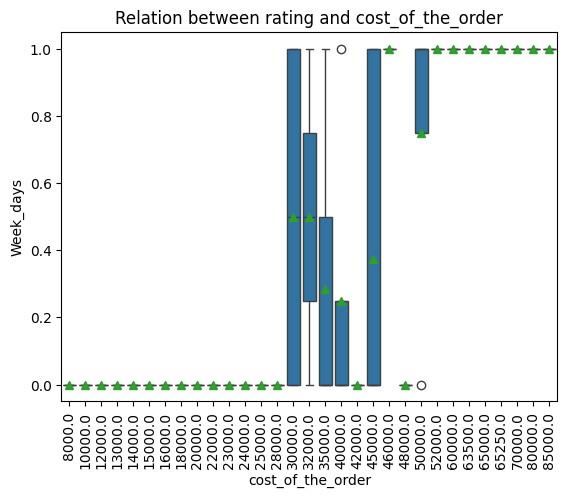

In [49]:
# create a new data sorted by rating
data=data.sort_values('cost_of_the_order')

# plot the relation between rating and delivery_time
sns.boxplot(data=data, x='cost_of_the_order', y='Deliver_time', showmeans=True)\
.set(title='Relation between rating and delivery_time')
plt.xticks(rotation=90);
plt.show();

# plot the relation between rating and food_preparation_time
sns.boxplot(data=data, x='cost_of_the_order', y='food_preparation_time', showmeans=True)\
.set(title='Relation between rating and food_preparation_time')
plt.xticks(rotation=90);
plt.show();

# plot the relation between rating and cost_of_the_order
sns.boxplot(data=data, x='cost_of_the_order', y='Week_days', showmeans=True)\
.set(title='Relation between rating and cost_of_the_order')
plt.xticks(rotation=90);
plt.show();

Question: The company charges the restaurant 25% on the online orders above having online order 60 and 15% on the orders having cost greater than 50 dollars. Find the net revenue generated by the company across all orders

In [50]:
# Create a function calculate revenu
def calculate_revenu(row):
        new_element = row['Online_order']
        if new_element > 20:
            val = new_element * 0.25
        elif new_element > 5:
            val = new_element * 0.15
        else:
            val = 0
        return val

# apply function
data['Online_order'] = data.apply(calculate_revenu,axis=1)

# calculate the sum of the column and print the result
print("the net revenue generated on all the orders given in the dataset is {:.2f} $".format(data['Online_order'].sum()))

the net revenue generated on all the orders given in the dataset is 5631.50 $


In [51]:
# select orders with 'total_time_delivery' > 60 and divided by total_orders and convert to %
# df['total_time_delivery'] and total orders were created previously
PRC_time_dlv_GT_60 = (data[data['Deliver_time'] > 60].shape[0]) * 100

print("The percentage of orders that have more than 60 minutes of total delivery time is {:.2f} %".format(PRC_time_dlv_GT_60))

The percentage of orders that have more than 60 minutes of total delivery time is 0.00 %


Question : The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends

In [52]:
#groupby day_of_the_week and check the mean of delivery_time
data.groupby('Week_days')['Deliver_time'].mean()

Week_days
False    23.819672
True     24.666667
Name: Deliver_time, dtype: float64

#Conclusions:

* The number of orders is higher on weekends.
* American cuisine is the most requested by customers, followed by Japanese and Italian cuisine.
* Customer preferences are not changed on weekends and weekdays.
* 5 restaurants receive more than 10 % of orders.
* 90% of orders are not rated, wich impact the business in two ways : 1- It's difficult to understand overall customer satisfaction. 2- Customers won't be interested in the service.

* 65 % of customers in the dataset made only one order.
* 28% of restaurants in the dataset received only one order.
* There is no difference in preparation time between weekends and weekdays.
* The total average delivery time is high and can be more than 1 hour.
Weekend delivery is faster than weekdays.
* External factors may impact the delivery time like traffic jam and proximity.